### Analysing data Gefitinib Src experiment on February 20 2015. Full experiment description in google docs 'Fluorescence assay protocol notes and lab notebook'. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lxml import etree
import pandas as pd
import os
import matplotlib.cm as cm 
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def get_wells_from_section(path):
    reads = path.xpath("*/Well")
    wellIDs = [read.attrib['Pos'] for read in reads]

    data = [(float(s.text), r.attrib['Pos'])
         for r in reads
         for s in r]

    datalist = {
      well : value
      for (value, well) in data
    }
    
    welllist = [
                [
                 datalist[chr(64 + row) + str(col)]          
                 if chr(64 + row) + str(col) in datalist else None
                 for row in range(1,9)
                ]
                for col in range(1,13)
                ]
                
    return welllist

In [3]:
file_GEF = "data/Gef_WIP_SMH_SrcBos_Extend_013015_mdfx_20150220_18.xml"
file_name = os.path.splitext(file_GEF)[0]

In [4]:
root = etree.parse(file_GEF)

In [5]:
Sections = root.xpath("/*/Section")
much = len(Sections)
print "****The xml file " + file_GEF + " has %s data sections:****" % much
for sect in Sections:
    print sect.attrib['Name']

****The xml file data/Gef_WIP_SMH_SrcBos_Extend_013015_mdfx_20150220_18.xml has 7 data sections:****
280_TopRead
280_BottomRead
Abs_280
350_TopRead
350_BottomRead
Abs_350
Abs_480


In [6]:
#Just going to work with topread for now
TopRead = root.xpath("/*/Section")[0]
welllist = get_wells_from_section(TopRead)
dataframe = pd.DataFrame(welllist, columns = ['A - Src','B - Buffer','C - Src','D - Buffer', 'E - Src','F - Buffer','G - Src','H - Buffer'])

(-0.5, 11.5)

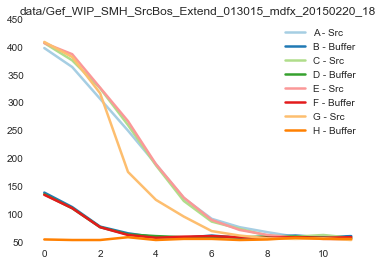

In [7]:
sns.set_palette("Paired", 10)
sns.set_context("notebook", rc={"lines.linewidth": 2.5})

dataframe.plot(figsize=(6, 4), title=file_name)
plt.xlim(-0.5,11.5)


In [8]:
dataframe

,A - Src,B - Buffer,C - Src,D - Buffer,E - Src,F - Buffer,G - Src,H - Buffer
0,399,140,408,137,408,136,410,56
1,365,114,377,112,388,112,383,55
2,308,79,327,78,328,78,318,55
3,251,67,261,65,268,64,177,60
4,191,60,189,62,191,59,127,55
5,130,59,125,60,131,61,97,57
6,93,63,88,60,91,62,71,57
7,78,59,75,60,73,60,63,55
8,69,61,63,61,64,59,58,56
9,61,63,61,61,59,60,57,59


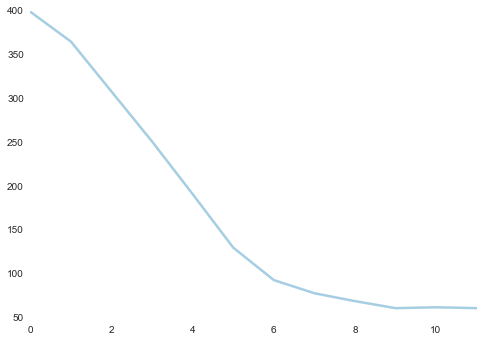

In [9]:
dataframe['A - Src'].plot()

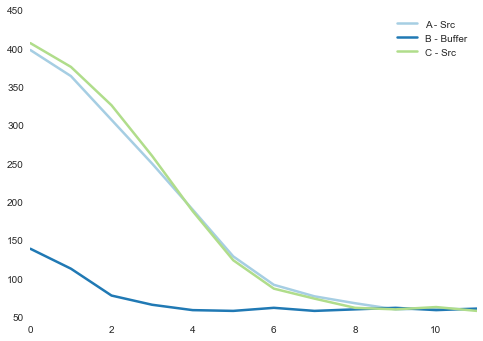

In [10]:
to_excl = ['D - Buffer', 'E - Src','F - Buffer','G - Src','H - Buffer']
dataframe.ix[:, dataframe.columns - to_excl].plot()

# Section II

## Can I just pick the best single Buffer and Src Data sets from each, and see how they compare?

In [11]:
root = etree.parse(file_GEF)
#Just going to keep working with topread for now
TopRead = root.xpath("/*/Section")[0]
welllist = get_wells_from_section(TopRead)
dataframe = pd.DataFrame(welllist, columns = ['A - Src','B - Buffer','C - Src','D - Buffer', 'E - Src','F - Buffer','G - Src','H - Buffer'])

In [12]:
Complex_Fluorescence = dataframe['A - Src']
Ligand_Fluorescence = dataframe['B - Buffer']
F_i = np.array(Complex_Fluorescence, np.float64)
Fligand_i = np.array(Ligand_Fluorescence, np.float64)

In [13]:
#Gefitinib concentration (M):
Lstated = np.array([20.0e-6,9.15e-6,4.18e-6,1.91e-6,0.875e-6,0.4e-6,0.183e-6,0.0837e-6,0.0383e-6,0.0175e-6,0.008e-6,0], np.float64)
#Protein concentration (M):
Pstated = 0.5e-6 * np.ones([12],np.float64)

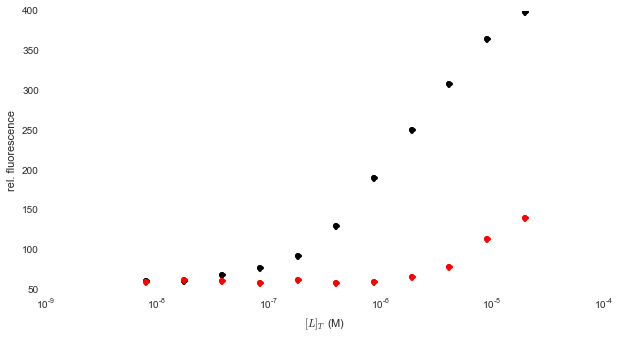

In [14]:
# Plot fluorescence intensity vs ligand concentration.
fig = figure(figsize=(10,5))
rcParams['figure.figsize'] = [10, 5];
clf();
semilogx(Lstated, F_i, 'ko');
hold(True)
semilogx(Lstated, Fligand_i, 'ro');
xlabel('$[L]_T$ (M)');
ylabel('rel. fluorescence');

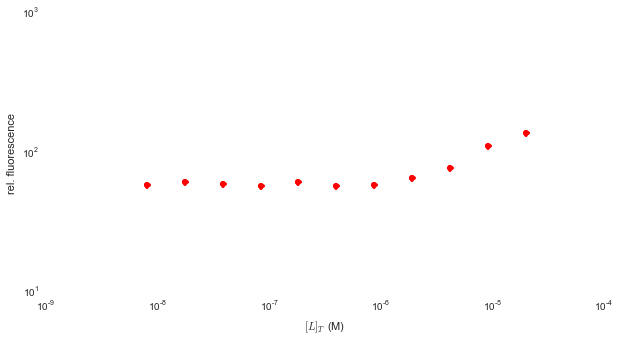

In [15]:
# Plot fluorescence intensity vs ligand concentration on a log plot to see if we are running into inner filter effects.
fig2 = pyplot.figure(figsize=(10,5))
rcParams['figure.figsize'] = [10, 5];
clf();
loglog(Lstated, Fligand_i, 'ro');
xlabel('$[L]_T$ (M)');
ylabel('rel. fluorescence');

In [16]:
# Remove highest concentrations due to aggregation issues.
nskip = 0
F_i = F_i[nskip:]
Fligand_i = Fligand_i[nskip:]
Pstated = Pstated[nskip:]
Lstated = Lstated[nskip:]

# Uncertainties in protein and ligand concentrations.
dPstated = 0.10 * Pstated # protein concentration uncertainty
dLstated = 0.08 * Lstated # ligand concentraiton uncertainty (due to gravimetric preparation and HP D300 dispensing)

dLstated[-1] = dLstated[-2]

print dPstated
print dLstated

[  5.00000000e-08   5.00000000e-08   5.00000000e-08   5.00000000e-08
   5.00000000e-08   5.00000000e-08   5.00000000e-08   5.00000000e-08
   5.00000000e-08   5.00000000e-08   5.00000000e-08   5.00000000e-08]
[  1.60000000e-06   7.32000000e-07   3.34400000e-07   1.52800000e-07
   7.00000000e-08   3.20000000e-08   1.46400000e-08   6.69600000e-09
   3.06400000e-09   1.40000000e-09   6.40000000e-10   6.40000000e-10]


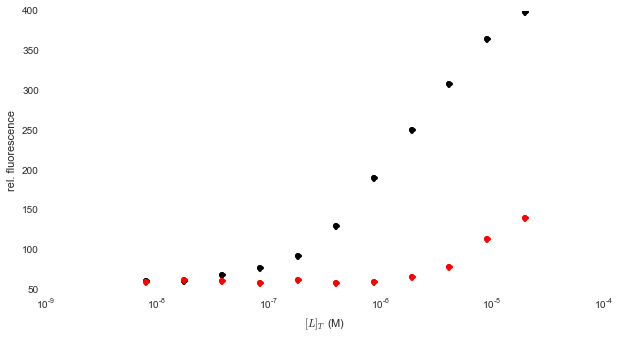

In [17]:
# Plot fluorescence intensity vs ligand concentration.
fig2 = pyplot.figure(figsize=(10,5))
rcParams['figure.figsize'] = [10, 5];
clf();
semilogx(Lstated, F_i, 'ko');
hold(True)
semilogx(Lstated, Fligand_i, 'ro');
xlabel('$[L]_T$ (M)');
ylabel('rel. fluorescence');

In [18]:
import pymc

# Two-component binding.
def two_component_binding(DeltaG, P, L):
    Kd = np.exp(DeltaG)
    PL = 0.5 * ((P + L + Kd) - np.sqrt((P + L + Kd)**2 - 4*P*L));  # complex concentration (M)                                                                                                                                                                                                         
    P = P - PL; # free protein concentration in sample cell after n injections (M)                                                                                                                                                                                                                          
    L = L - PL; # free ligand concentration in sample cell after n injections (M)                                                                                                                                                                                                                           
    return [P, L, PL]

# Create a pymc model
def make_model(Pstated, dPstated, Lstated, dLstated, Fobs_i, Fligand_i):
    N = len(Lstated)
    
    # Prior on binding free energies.
    DeltaG = pymc.Uniform('DeltaG', lower=-40, upper=+40, value=0.0) # binding free energy (kT), uniform over huge range
    #DeltaG = pymc.Normal('DeltaG', mu=0, tau=1./(12.5**2)) # binding free energy (kT), using a Gaussian prior inspured by ChEMBL
        
    # Priors on true concentrations of protein and ligand.
    #Ptrue = pymc.Lognormal('Ptrue', mu=np.log(Pstated**2 / np.sqrt(dPstated**2 + Pstated**2)), tau=np.sqrt(np.log(1.0 + dPstated**2/Pstated**2))**(-2)) # protein concentration (M)
    #Ltrue = pymc.Lognormal('Ltrue', mu=np.log(Lstated**2 / np.sqrt(dLstated**2 + Lstated**2)), tau=np.sqrt(np.log(1.0 + dLstated**2/Lstated**2))**(-2)) # ligand concentration (M)
    Ptrue = pymc.Normal('Ptrue', mu=Pstated, tau=dPstated**(-2)) # protein concentration (M)
    Ltrue = pymc.Normal('Ltrue', mu=Lstated, tau=dLstated**(-2)) # ligand concentration (M)
    Ltrue_control = pymc.Normal('Ltrue_control', mu=Lstated, tau=dLstated**(-2)) # ligand concentration (M)

    # Priors on fluorescence intensities of complexes (later divided by a factor of Pstated for scale).
    Fmax = max(Fobs_i.max(), Fligand_i.max())
    F_background = pymc.Uniform('F_background', lower=0.0, upper=Fmax) # background fluorescence
    F_PL = pymc.Uniform('F_PL', lower=0.0, upper=Fmax/min(Pstated.max(),Lstated.max())) # complex fluorescence
    F_L = pymc.Uniform('F_L', lower=0.0, upper=Fmax/Lstated.max()) # ligand fluorescence

    # Unknown experimental measurement error.
    log_sigma = pymc.Uniform('log_sigma', lower=-10, upper=+2, value=0.0) 
    @pymc.deterministic
    def precision(log_sigma=log_sigma): # measurement precision
        return 1.0 / np.exp(log_sigma)**2

    # Fluorescence model.
    @pymc.deterministic
    def Fmodel(F_background=F_background, F_PL=F_PL, F_L=F_L, Ptrue=Ptrue, Ltrue=Ltrue, DeltaG=DeltaG):
        Fmodel_i = np.zeros([N])
        for i in range(N):
            [P, L, PL] = two_component_binding(DeltaG, Ptrue[i], Ltrue[i])
            Fmodel_i[i] = (F_PL*PL + F_L*L) + F_background
        return Fmodel_i

    # Fluorescence model, ligand only.
    @pymc.deterministic
    def Fligand(F_background=F_background, F_L=F_L, Ltrue_control=Ltrue_control):
        Fmodel_i = np.zeros([N])
        for i in range(N):
            Fmodel_i[i] = (F_L*Ltrue_control[i]) + F_background
        return Fmodel_i
    
    # Experimental error on fluorescence observations.
    Fobs_model = pymc.Normal('Fobs_i', mu=Fmodel, tau=precision, size=[N], observed=True, value=Fobs_i) # observed data
    Fligand_model = pymc.Normal('Fligand_i', mu=Fligand, tau=precision, size=[N], observed=True, value=Fligand_i) # ligand only data
    
    # Construct dictionary of model variables.
    pymc_model = { 'Ptrue' : Ptrue, 
                   'Ltrue' : Ltrue, 
                   'Ltrue_control' : Ltrue_control, 
                   'log_sigma' : log_sigma, 
                   'precision' : precision, 
                   'F_PL' : F_PL, 
                   'F_L' : F_L, 
                   'F_background' : F_background,
                   'Fmodel_i' : Fmodel, 
                   'Fligand_i' : Fligand, 
                   'Fobs_model' : Fobs_model, 
                   'Fligand_model' : Fligand_model, 
                   'DeltaG' : DeltaG # binding free energy
                   }
    return pymc_model


# Build model.
pymc_model = pymc.Model(make_model(Pstated, dPstated, Lstated, dLstated, F_i, Fligand_i))

# Sample with MCMC
mcmc = pymc.MCMC(pymc_model, db='ram', name='Sampler', verbose=True)
mcmc.sample(iter=100000, burn=10000, thin=50, progress_bar=False)

Couldn't import dot_parser, loading of dot files will not be possible.


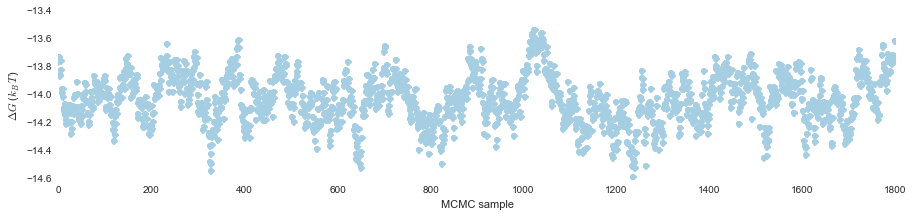

In [19]:
# Plot trace of DeltaG.
rcParams['figure.figsize'] = [15, 3]
plot(mcmc.DeltaG.trace(), 'o');
xlabel('MCMC sample');
ylabel('$\Delta G$ ($k_B T$)');

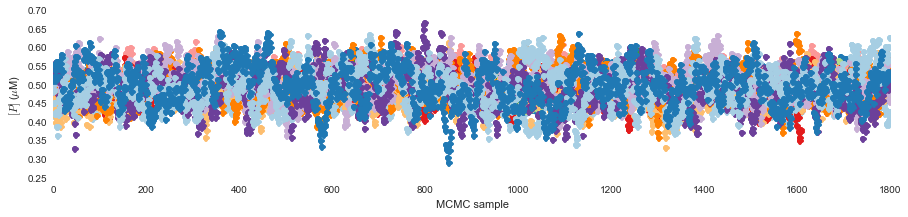

In [20]:
# Plot trace of true protein concentration.
rcParams['figure.figsize'] = [15, 3]
plot(mcmc.Ptrue.trace()*1e6, 'o');
xlabel('MCMC sample');
ylabel('$[P]$ ($\mu$M)');

-2.2549506087e-09


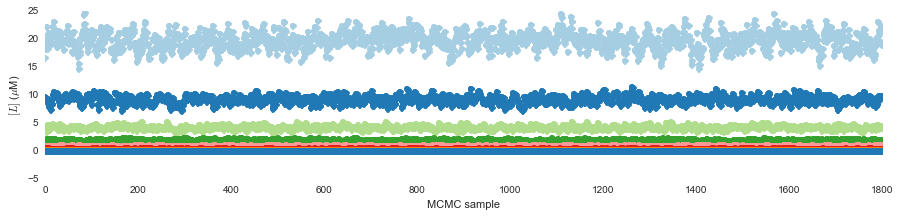

In [21]:
# Plot trace of true protein concentration.
rcParams['figure.figsize'] = [15, 3]
plot(mcmc.Ltrue.trace()*1e6, 'o');
xlabel('MCMC sample');
ylabel('$[L]$ ($\mu$M)');
print mcmc.Ltrue.trace().min()

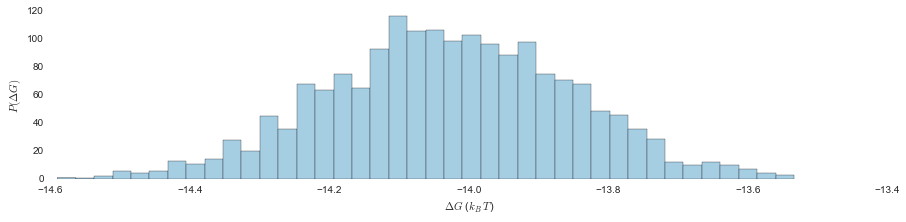

In [22]:
# Plot histogram of DeltaG.
rcParams['figure.figsize'] = [15, 3]
hist(mcmc.DeltaG.trace(), 40);
xlabel('$\Delta G$ ($k_B T$)');
ylabel('$P(\Delta G)$');

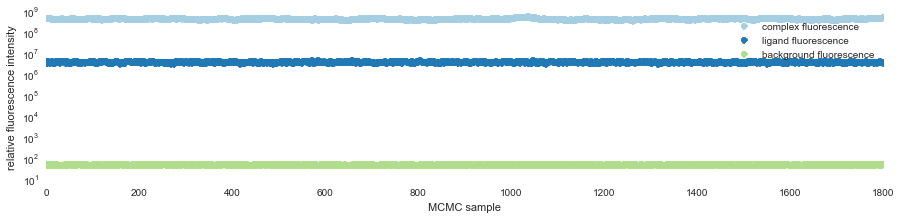

In [23]:
# Plot trace of intrinsic fluorescence parameters.
rcParams['figure.figsize'] = [15, 3]
semilogy(mcmc.F_PL.trace(), 'o', mcmc.F_L.trace(), 'o', mcmc.F_background.trace(), 'o');
legend(['complex fluorescence', 'ligand fluorescence', 'background fluorescence']);
xlabel('MCMC sample');
ylabel('relative fluorescence intensity');

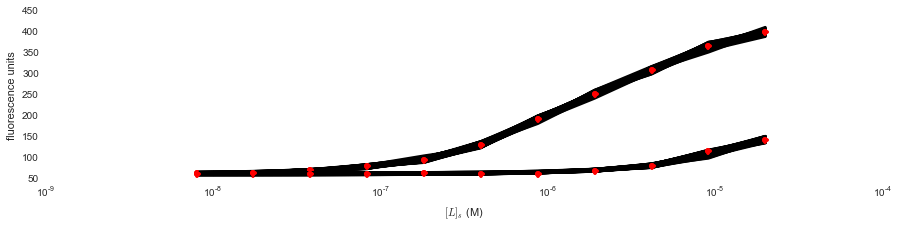

In [24]:
# Plot model fit.
rcParams['figure.figsize'] = [15, 3]
figure = pyplot.gcf() # get current figure
Fmodels = mcmc.Fmodel_i.trace()
Fligands = mcmc.Fligand_i.trace()
clf();
hold(True)
for Fmodel in Fmodels:
    semilogx(Lstated, Fmodel, 'k-')
semilogx(Lstated, F_i, 'ro')
for Fligand in Fligands:
    semilogx(Lstated, Fligand, 'k-')
semilogx(Lstated, Fligand_i, 'ro')
hold(False)
xlabel('$[L]_s$ (M)');
ylabel('fluorescence units');
